In [299]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [300]:
from samlet import SimpleSamletModelClass

In [301]:
model = SimpleSamletModelClass()

In [302]:
par = model.par
sol = model.sol
sim = model.sim

In [303]:
%time model.solve()

29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 10min 13s, sys: 6.12 s, total: 10min 19s
Wall time: 10min 55s


Checking the shape of the utility function

In [304]:
liste = []
c_list = []

for c in np.linspace(0.1,3,num=100):
    hm = model.util_s(c, 20, 8, 10)
    liste.append(hm)
    c_list.append(c)


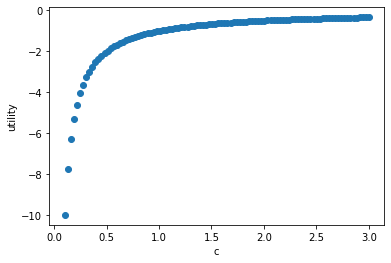

In [305]:
#utility wrt consumption
fig, ax = plt.subplots()
ax.scatter(c_list,liste)
ax.set(xlabel='c',ylabel='utility');

Plotting solutions

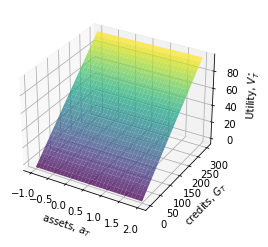

In [306]:
#Value of choice graph
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

t = par.T-10
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a_mesh, G_mesh, sol.V[t,9],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='assets, $a_{T}$',ylabel='credits, $G_T$',zlabel='Utility, $V_{T}^{\star}$');

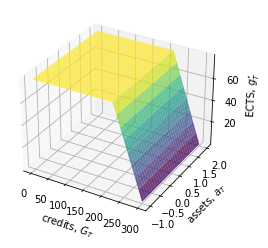

In [307]:
#credit graph
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

t = par.T-24
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(G_mesh, a_mesh, sol.g[t,9],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='ECTS, $g_{T}^{\star}$');

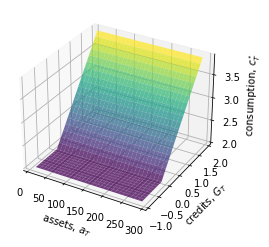

In [308]:
#consumption graph
a_mesh, G_mesh = np.meshgrid(par.a_grid[1:-1],par.G_grid[1:-1],indexing='ij')

t = par.T-21
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(G_mesh, a_mesh, sol.c[t,1,1:-1,1:-1],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
#ax.plot_surface(G_mesh, a_mesh, sol.c[t-1,1,1:-1,1:-1],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(ylabel='credits, $G_{T}$',xlabel='assets, $a_T$',zlabel='consumption, $c_{T}^{\star}$');

Simulation

In [309]:
model.simulate()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [310]:
model_a = model.copy()

model_a.sim.a_init[:] = 0
#model_a.sim.m_init[:] = 1
model_a.simulate()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


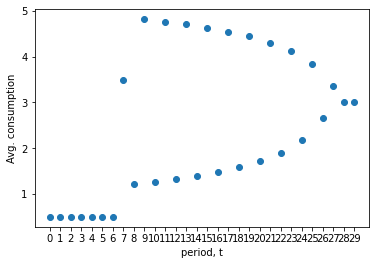

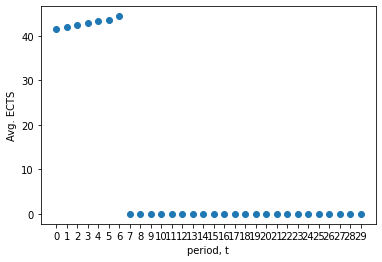

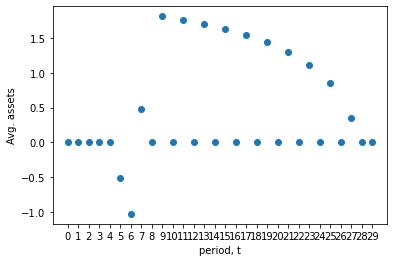

In [311]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=5))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.g,axis=0),decimals=3))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(model_a.sim.a,axis=0))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(par.simT));

In [312]:
heh = np.around(model_a.sim.a,decimals=2)
heh2 = np.around(model_a.sim.c,decimals=2)
#heh[1]
heh2[1]

array([0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 3.48, 1.22, 4.82, 1.27,
       4.76, 1.33, 4.7 , 1.4 , 4.63, 1.48, 4.55, 1.59, 4.44, 1.72, 4.3 ,
       1.9 , 4.12, 2.17, 3.85, 2.66, 3.35, 3.  , 3.  ])

In [313]:
heh = model_a.sim.G
heh[1]

array([  0.        ,  41.4500354 ,  83.36827458, 125.75914213,
       168.62529533, 211.96685109, 255.57600414, 300.00002431,
       300.00002431, 300.00002431, 300.00002431, 300.00002431,
       300.00002431, 300.00002431, 300.00002431, 300.00002431,
       300.00002431, 300.00002431, 300.00002431, 300.00002431,
       300.00002431, 300.00002431, 300.00002431, 300.00002431,
       300.00002431, 300.00002431, 300.00002431, 300.00002431,
       300.00002431, 300.00002431])

In [314]:
cons = []
for a in np.linspace(-1,3,num=100):
    cons.append(model.cons_last(a,30))

obj = []
for c in cons:
    obj.append(model.obj_last(c))

print(cons)
print(obj)

[1.00001, 1.0404140404040405, 1.080818080808081, 1.1212221212121212, 1.1616261616161618, 1.202030202020202, 1.2424342424242425, 1.282838282828283, 1.3232423232323234, 1.3636463636363638, 1.404050404040404, 1.4444544444444445, 1.484858484848485, 1.5252625252525254, 1.5656665656565658, 1.606070606060606, 1.6464746464646467, 1.686878686868687, 1.7272827272727274, 1.7676867676767678, 1.8080908080808082, 1.8484948484848487, 1.888898888888889, 1.9293029292929296, 1.9697069696969698, 2.0101110101010105, 2.0505150505050507, 2.090919090909091, 2.1313231313131316, 2.171727171717172, 2.212131212121212, 2.2525352525252527, 2.2929392929292933, 2.3333433333333335, 2.3737473737373738, 2.4141514141414144, 2.4545554545454547, 2.494959494949495, 2.5353635353535355, 2.575767575757576, 2.6161716161616164, 2.6565756565656566, 2.6969796969696973, 2.7373837373737375, 2.7777877777777777, 2.8181918181818184, 2.858595858585859, 2.8989998989898993, 2.9394039393939395, 2.97980797979798, 3.0202120202020204, 3.0606